In [1]:
%matplotlib inline

from __future__ import print_function, division
import numpy as np
import sys, os
from astropy.table import Table
from astropy.io import fits
import fitsio
import matplotlib.pyplot as plt

In [2]:
cat = Table.read('/Users/roz18/Downloads/cesam_zcosbrightspec20k_dr3_catalog.txt', format='ascii.commented_header')
print(len(cat))

20690


In [3]:
cat

id,ra,dec,zpec,cc,mag_sel,flag_s,flag_x,flag_r,flag_uv
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
701873,149.968887,2.563699,0.1817,9.1,22.46,-1.0,0.0,0.0,0.0
701911,149.849625,2.522367,0.3751,4.5,22.48,-1.0,0.0,0.0,0.0
701916,149.855301,2.541329,0.5007,4.5,22.47,-1.0,0.0,0.0,0.0
701926,149.857544,2.588878,0.1512,9.1,22.46,-1.0,0.0,0.0,0.0
701939,149.823364,2.551556,0.1959,29.5,22.18,-1.0,0.0,0.0,0.0
702044,150.666,2.769604,0.739,21.5,22.41,-1.0,0.0,0.0,0.0
702181,150.153961,2.700111,0.3537,22.5,22.56,-1.0,0.0,0.0,0.0
702296,149.84108,2.674427,0.2606,21.5,21.25,-1.0,0.0,0.0,0.0
702398,150.335876,2.053984,0.8372,2.5,23.02,-1.0,0.0,1.0,0.0


In [4]:
# remove invalid objects
mask = ((cat['ra']!=-99.9) | (cat['dec']!=-99.9))
print(np.sum(~mask))
cat = cat[mask]

1


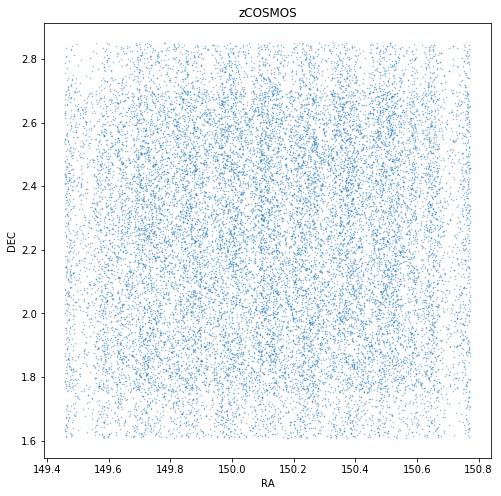

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(cat['ra'], cat['dec'], '.', markersize=1, alpha=0.5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('zCOSMOS')
plt.show()

__Check for duplicates__

In [6]:
from __future__ import division, print_function
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import sys, os
home = os.path.expanduser("~")+'/'
sys.path.append(home+'git/Python/user_modules/')
import match_coord

60 objects with a nearby neighbor


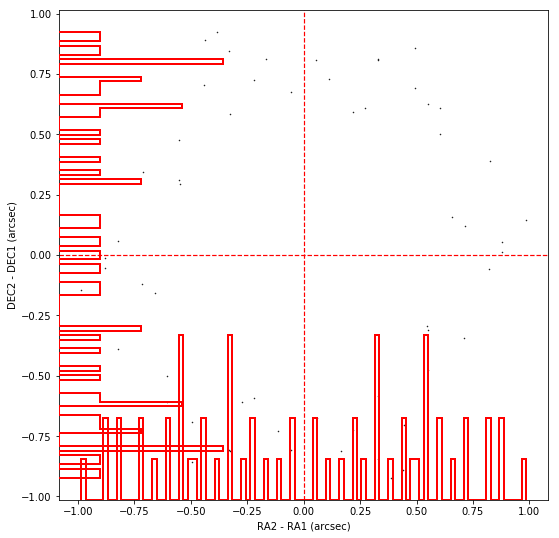

0 0.00%


In [7]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=1., 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

In [14]:
n_duplicates, idx1, idx2 = match_coord.match_self(cat['ra'], cat['dec'], search_radius=0.6, 
                                                  return_indices=True, plot_q=True)
print(n_duplicates, '{:.2f}%'.format(n_duplicates/len(cat)*100))

0 objects with a nearby neighbor
0 0.00%


In [19]:
mask = (cat['cc']>=3) & (cat['cc']<5)
print(np.sum(mask), np.sum(mask)/len(cat))

mask = (cat['cc']>=3) & (cat['cc']<6)
print(np.sum(mask), np.sum(mask)/len(cat))

11935 0.5768766010923679


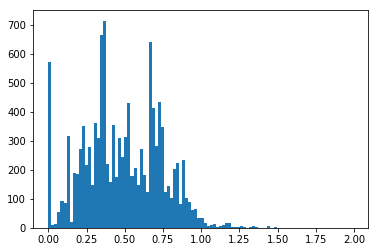

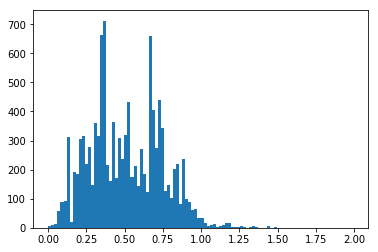

In [23]:
mask = (cat['cc']>=3) & (cat['cc']<5)
plt.hist(cat['zpec'][mask], 100)
plt.show()

mask = (cat['cc']>=3) & (cat['cc']<5) & (cat['zpec']>0)
plt.hist(cat['zpec'][mask], 100)
plt.show()